In [1]:
import experiment_utils
import pandas as pd

import matplotlib.pyplot as plt
import pickle

from moopt import monise
from fair_models import FairScalarization, EqualScalarization
from model_aggregation import compare_ensembles_fair_metrics, compare_ensembles_nds

In [2]:
dataset = 'compas'
fair_feature = 'race'

In [3]:
X_train = pd.read_pickle("data/"+dataset+"_"+fair_feature+"/X_train.pickle")
with open("data/"+dataset+"_"+fair_feature+"/y_train.pickle", 'rb') as f:
    y_train = pickle.load(f)

X_val = pd.read_pickle("data/"+dataset+"_"+fair_feature+"/X_valid.pickle")
with open("data/"+dataset+"_"+fair_feature+"/y_valid.pickle", 'rb') as f:
    y_val = pickle.load(f)

X_test = pd.read_pickle("data/"+dataset+"_"+fair_feature+"/X_test.pickle")
with open("data/"+dataset+"_"+fair_feature+"/y_test.pickle", 'rb') as f:
    y_test = pickle.load(f)

# MOOError

In [4]:
## Train 150 models
moo_err = monise(weightedScalar=FairScalarization(X_train, y_train, fair_feature),
                singleScalar=FairScalarization(X_train, y_train, fair_feature),
                nodeTimeLimit=2, targetSize=150,
                targetGap=0, nodeGap=0.05, norm=False)

moo_err.optimize()

## Evaluate the models in val
mooerr_values = []
mooerr_sols = []

for solution in moo_err.solutionsList:
    mooerr_sols.append(solution.x)
    mooerr_values.append(experiment_utils.evaluate_model_test(solution.x, fair_feature, X_val, y_val))

mooerr_df = pd.DataFrame(mooerr_values)

2021-08-26 20:34:51,005 - moopt.monise - DEBUG: Finding 1th individual minima
2021-08-26 20:34:51,046 - moopt.monise - DEBUG: Finding 2th individual minima
2021-08-26 20:34:51,166 - moopt.monise - DEBUG: Finding 3th individual minima


Academic license - for non-commercial use only - expires 2021-10-24
Using license file /home/viguardieiro/gurobi.lic


2021-08-26 20:34:51,575 - moopt.monise - DEBUG: 4th solution - importance: 1.0
2021-08-26 20:34:51,951 - moopt.monise - DEBUG: 5th solution - importance: 1.0
2021-08-26 20:34:52,183 - moopt.monise - DEBUG: 6th solution - importance: 1.0
2021-08-26 20:34:52,379 - moopt.monise - DEBUG: 7th solution - importance: 1.0
2021-08-26 20:34:52,551 - moopt.monise - DEBUG: 8th solution - importance: 1.0
2021-08-26 20:34:52,936 - moopt.monise - DEBUG: 9th solution - importance: 0.705764099201362
2021-08-26 20:34:53,230 - moopt.monise - DEBUG: 10th solution - importance: 0.39085132718215676
2021-08-26 20:34:53,495 - moopt.monise - DEBUG: 11th solution - importance: 0.3607049293083019
2021-08-26 20:34:53,707 - moopt.monise - DEBUG: 12th solution - importance: 0.22193093215385823
2021-08-26 20:34:53,959 - moopt.monise - DEBUG: 13th solution - importance: 0.19403882415557264
2021-08-26 20:34:54,198 - moopt.monise - DEBUG: 14th solution - importance: 0.15622907158028818
2021-08-26 20:34:54,476 - moopt.m

In [5]:
err_fair_results = compare_ensembles_fair_metrics(mooerr_df, mooerr_sols, fair_feature, X_test, y_test)
err_nds_results = compare_ensembles_nds(mooerr_df, mooerr_sols, fair_feature, X_test, y_test)

In [6]:
## Train 150 models
mooacep = monise(weightedScalar=EqualScalarization(X_train, y_train, fair_feature),
            singleScalar=EqualScalarization(X_train, y_train, fair_feature),
            nodeTimeLimit=2, targetSize=150,
            targetGap=0, nodeGap=0.01, norm=False)

mooacep.optimize()

## Evaluate the models in val
mooacc_values = []
mooacc_sols = []

for solution in mooacep.solutionsList:
    mooacc_sols.append(solution.x)
    mooacc_values.append(experiment_utils.evaluate_model_test(solution.x, fair_feature, X_val, y_val))

mooacep_df = pd.DataFrame(mooacc_values)

2021-08-26 20:38:19,032 - moopt.monise - DEBUG: Finding 1th individual minima
2021-08-26 20:38:19,105 - moopt.monise - DEBUG: Finding 2th individual minima
2021-08-26 20:38:19,253 - moopt.monise - DEBUG: Finding 3th individual minima
2021-08-26 20:38:19,387 - moopt.monise - DEBUG: Finding 4th individual minima
2021-08-26 20:38:19,568 - moopt.monise - DEBUG: 5th solution - importance: 1.0
2021-08-26 20:38:19,711 - moopt.monise - DEBUG: 6th solution - importance: 1.0
2021-08-26 20:38:19,846 - moopt.monise - DEBUG: 7th solution - importance: 1.0
2021-08-26 20:38:20,014 - moopt.monise - DEBUG: 8th solution - importance: 1.0
2021-08-26 20:38:20,175 - moopt.monise - DEBUG: 9th solution - importance: 1.0
2021-08-26 20:38:20,442 - moopt.monise - DEBUG: 10th solution - importance: 0.608996442560711
2021-08-26 20:38:20,788 - moopt.monise - DEBUG: 11th solution - importance: 0.49609419123257464
2021-08-26 20:38:21,062 - moopt.monise - DEBUG: 12th solution - importance: 0.35531478844733283
2021-08

In [7]:
acep_fair_results = compare_ensembles_fair_metrics(mooacep_df, mooacc_sols, fair_feature, X_test, y_test)
acep_nds_results = compare_ensembles_nds(mooacep_df, mooacc_sols, fair_feature, X_test, y_test)

# Vis

In [8]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

def vis_comp(err_results, acep_results):
    fig, axs = plt.subplots(nrows=2, ncols=4, constrained_layout=True, figsize=(15,6), sharex=True)

    # MOOErr
    err_results['Acc'].plot.bar(ax=axs[0,0], zorder=3)
    axs[0, 0].set_title(r'Accuracy ($\uparrow$better)')
    axs[0, 0].set_ylabel('MOOErr', fontsize=12)
    high_acc = max(err_results['Acc'].max(), acep_results['Acc'].max())
    low_acc = min(err_results['Acc'].min(), acep_results['Acc'].min())
    axs[0, 0].set_ylim([low_acc-0.25*(high_acc-low_acc), high_acc+0.25*(high_acc-low_acc)])

    err_results['DP'].plot.bar(ax=axs[0,1], zorder=3)
    axs[0, 1].set_title(r'Demographic Parity ($\uparrow$better)')
    high_dp = max(err_results['DP'].max(), acep_results['DP'].max())
    low_dp = min(err_results['DP'].min(), acep_results['DP'].min())
    axs[0, 1].set_ylim([low_dp-0.25*(high_dp-low_dp), high_dp+0.25*(high_dp-low_dp)])

    err_results['EO'].plot.bar(ax=axs[0,2], zorder=3)
    axs[0, 2].set_title(r'Equal Oportunity ($\uparrow$better)')
    high_eo = max(err_results['EO'].max(), acep_results['EO'].max())
    low_eo = min(err_results['EO'].min(), acep_results['EO'].min())
    axs[0, 2].set_ylim([low_eo-0.25*(high_eo-low_eo), high_eo+0.25*(high_eo-low_eo)])

    err_results['CV'].plot.bar(ax=axs[0,3], zorder=3)
    axs[0, 3].set_title(r'Coeficient of Variation ($\downarrow$better)')
    high_cv = max(err_results['CV'].max(), acep_results['CV'].max())
    low_cv = min(err_results['CV'].min(), acep_results['CV'].min())
    axs[0, 3].set_ylim([low_cv-0.25*(high_cv-low_cv), high_cv+0.25*(high_cv-low_cv)])

    # MOOAcep
    acep_results['Acc'].plot.bar(ax=axs[1,0], color='red', zorder=3)
    axs[1, 0].set_xlabel('')
    axs[1, 0].set_xticklabels(acep_results.index, rotation=45, ha="right", rotation_mode="anchor")
    axs[1, 0].set_ylabel('MOOAcep', fontsize=12)
    axs[1, 0].set_ylim([low_acc-0.25*(high_acc-low_acc), high_acc+0.25*(high_acc-low_acc)])

    acep_results['DP'].plot.bar(ax=axs[1,1], color='red', zorder=3)
    axs[1, 1].set_xlabel('')
    axs[1, 1].set_xticklabels(acep_results.index, rotation=45, ha="right", rotation_mode="anchor")
    axs[1, 1].set_ylim([low_dp-0.25*(high_dp-low_dp), high_dp+0.25*(high_dp-low_dp)])

    acep_results['EO'].plot.bar(ax=axs[1,2], color='r', zorder=3)
    axs[1, 2].set_xlabel('')
    axs[1, 2].set_xticklabels(acep_results.index, rotation=45, ha="right", rotation_mode="anchor")
    axs[1, 2].set_ylim([low_eo-0.25*(high_eo-low_eo), high_eo+0.25*(high_eo-low_eo)])

    acep_results['CV'].plot.bar(ax=axs[1,3], color='r', zorder=3)
    axs[1, 3].set_xlabel('')
    axs[1, 3].set_xticklabels(acep_results.index, rotation=45, ha="right", rotation_mode="anchor")
    axs[1, 3].set_ylim([low_cv-0.25*(high_cv-low_cv), high_cv+0.25*(high_cv-low_cv)])

    for ax in axs.flatten():
        #ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelleft=True)
        ax.grid(axis='y', color='gray', linestyle='dotted')

    #plt.show()
    return fig, axs

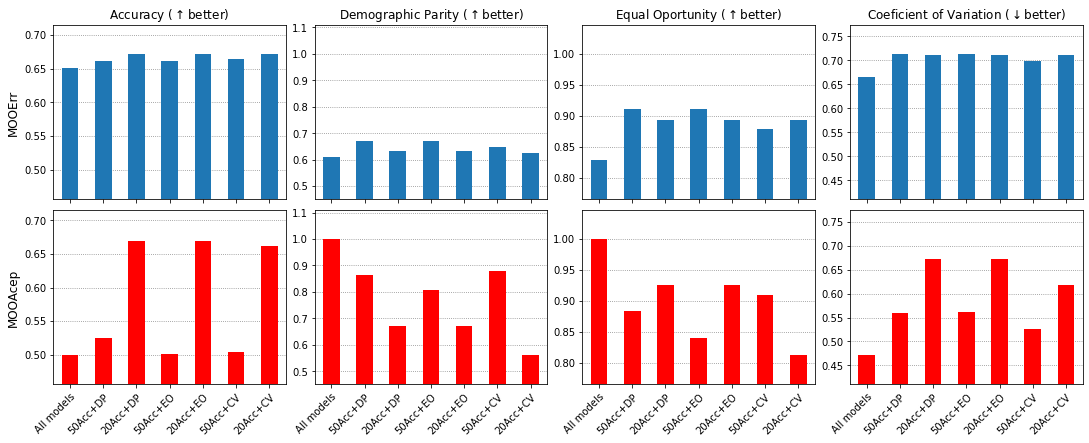

In [9]:
fig, axs = vis_comp(err_fair_results, acep_fair_results)
#fig.suptitle('Fair Metric Filter', size=14)
#plt.savefig('images/exp_aggregation/compas/fair_metric_comparation.png')
plt.savefig('images/exp_aggregation/compas/fair_metric_comparation.pgf')
plt.show()

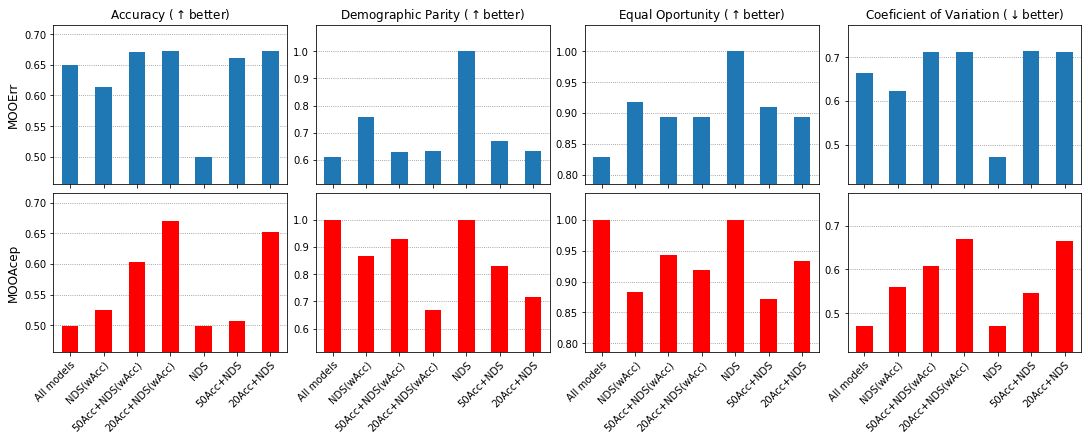

In [10]:
fig, axs = vis_comp(err_nds_results, acep_nds_results)
#fig.suptitle('NDS filter', size=14)
plt.savefig('images/exp_aggregation/compas/fair_metric_comparation.png')
plt.show()

In [11]:
err_nds_results

,Acc,EO,DP,CV
Filter,,,,
All models,0.650450,0.828265,0.610000,0.664398
NDS(wAcc),0.614414,0.917807,0.756667,0.622403
50Acc+NDS(wAcc),0.670270,0.893793,0.628788,0.711654
20Acc+NDS(wAcc),0.672072,0.893793,0.632381,0.711242
NDS,0.499099,1.000000,1.000000,0.471121
50Acc+NDS,0.661261,0.910345,0.670520,0.713535
20Acc+NDS,0.672072,0.893793,0.632381,0.711242


In [12]:
acep_nds_results

,Acc,EO,DP,CV
Filter,,,,
All models,0.499099,1.000000,1.000000,0.471121
NDS(wAcc),0.524324,0.883397,0.865204,0.559420
50Acc+NDS(wAcc),0.603604,0.942730,0.931159,0.606895
20Acc+NDS(wAcc),0.670270,0.918261,0.666667,0.668630
NDS,0.499099,1.000000,1.000000,0.471121
50Acc+NDS,0.506306,0.871212,0.828829,0.546758
20Acc+NDS,0.652252,0.934093,0.717391,0.664217
